# DHANUSHKUMAR R
A Project for an internship at "TECHNOHACKS EDUTECH"

Task 7 : Heart Disease Prediction

Dataset : heart.csv

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:
dataset = pd.read_csv('C:/Users/User/Downloads/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory data analysis (EDA)

1    165
0    138
Name: target, dtype: int64


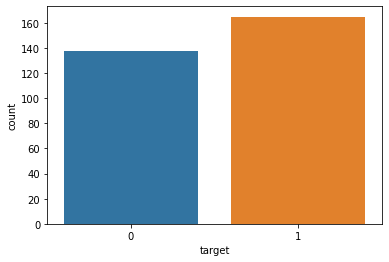

In [5]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

# Percentage Heart problems

In [6]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# Analyse  Chest Pain Type

<AxesSubplot:xlabel='cp', ylabel='target'>

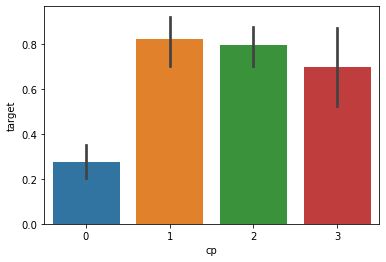

In [7]:
dataset["cp"].unique()
sns.barplot(x=dataset["cp"],y=y)

# Analysing the FBS feature

<AxesSubplot:xlabel='fbs', ylabel='target'>

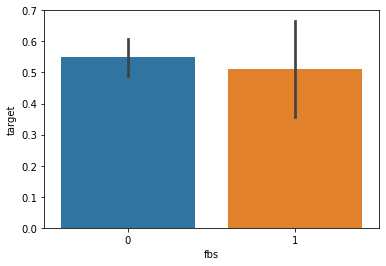

In [8]:
dataset["fbs"].describe()
dataset["fbs"].unique()
sns.barplot(x=dataset["fbs"],y=y)

<AxesSubplot:xlabel='restecg', ylabel='target'>

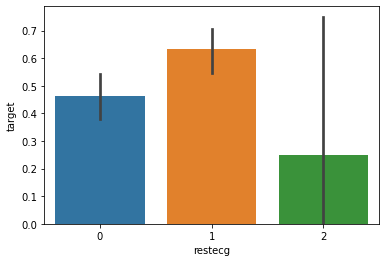

In [9]:
dataset["restecg"].unique()
sns.barplot(x=dataset["restecg"],y=y)

# Analysing the 'exang' feature

<AxesSubplot:xlabel='exang', ylabel='target'>

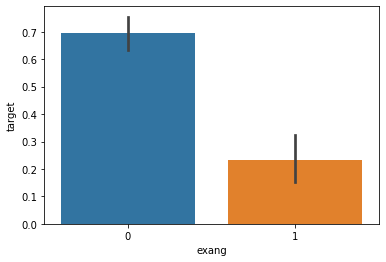

In [10]:
dataset["exang"].unique()
sns.barplot(x=dataset["exang"],y=y)

# Analysing the Slope feature

<AxesSubplot:xlabel='slope', ylabel='target'>

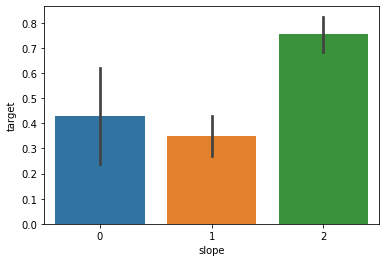

In [11]:
dataset["slope"].unique()
sns.barplot(x=dataset["slope"],y=y)


# Analysing the 'ca' feature

<AxesSubplot:xlabel='ca', ylabel='count'>

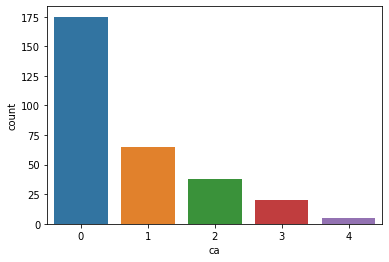

In [12]:
dataset["ca"].unique()
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

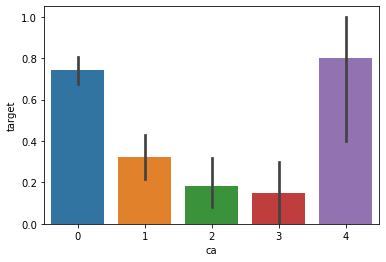

In [13]:
sns.barplot(x=dataset["ca"],y=y)

In [14]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

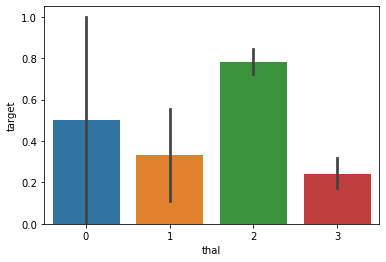

In [15]:
sns.barplot(x=dataset["thal"],y=y)

<AxesSubplot:xlabel='thal', ylabel='target'>

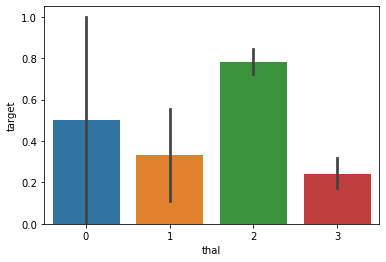

In [16]:
sns.barplot(x=dataset["thal"],y=y)

# Train test split

In [17]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [18]:
X_train.shape


(242, 13)

In [19]:
X_test.shape


(61, 13)

In [20]:
Y_train.shape

(242,)

In [21]:
Y_test.shape

(61,)

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [24]:
Y_pred_nb.shape


(61,)

In [25]:

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


# SVM

In [26]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [28]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [30]:
Y_pred_knn.shape

(61,)

In [31]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


The accuracy score achieved using KNN is: 67.21 %


# Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [33]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [44]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


In [40]:
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)


Epoch 1/300
8/8 [==============================] - 2s 7ms/step - loss: 51.6413 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 44.0171 - accuracy: 0.5413
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 36.5956 - accuracy: 0.5413
Epoch 4/300
8/8 [==============================] - 0s 9ms/step - loss: 28.5771 - accuracy: 0.5413
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 21.4425 - accuracy: 0.5455
Epoch 6/300
8/8 [==============================] - 0s 10ms/step - loss: 13.5889 - accuracy: 0.5207
Epoch 7/300
8/8 [==============================] - 0s 10ms/step - loss: 8.3597 - accuracy: 0.5124
Epoch 8/300
8/8 [==============================] - 0s 10ms/step - loss: 7.3360 - accuracy: 0.4050
Epoch 9/300
8/8 [==============================] - 0s 9ms/step - loss: 7.1191 - accuracy: 0.4091
Epoch 10/300
8/8 [==============================] - 0s 10ms/step - loss: 6.4183 - accuracy: 0.4174
Epoch 11/300
8/8 [=